Старостенок Дмитрий Владимирович

КЭ-303

Вариант 29


In [1]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay

from sklearn import preprocessing
import pandas as pd
import seaborn as sns

In [2]:
# считываем данные из файла
data = pd.read_csv("./android_traffic.csv", sep=";")
# первые 20 файлов
data.head(20)

,name,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,duracion,avg_local_pkt_rate,avg_remote_pkt_rate,source_app_packets.1,dns_query_times,type
0,AntiVirus,36,6,3,3911,0,0,39,33,5100,4140,NaN,NaN,NaN,39,3,benign
1,AntiVirus,117,0,9,23514,0,0,128,107,26248,24358,NaN,NaN,NaN,128,11,benign
2,AntiVirus,196,0,6,24151,0,0,205,214,163887,24867,NaN,NaN,NaN,205,9,benign
3,AntiVirus,6,0,1,889,0,0,7,6,819,975,NaN,NaN,NaN,7,1,benign
4,AntiVirus,6,0,1,882,0,0,7,6,819,968,NaN,NaN,NaN,7,1,benign
5,AntiVirus,54,54,3,5062,0,0,63,54,5457,5719,NaN,NaN,NaN,63,9,benign
6,AntiVirus,6,0,1,889,0,0,7,6,819,975,NaN,NaN,NaN,7,1,benign
7,AntiVirus,6,0,1,1154,0,0,7,6,593,1228,NaN,NaN,NaN,7,1,benign
8,AntiVirus,6,0,1,888,0,0,7,6,819,974,NaN,NaN,NaN,7,1,benign
9,AntiVirus,196,0,3,16110,0,0,200,264,300472,16410,NaN,NaN,NaN,200,4,benign


In [3]:
# Колонки таблицы данных
data.columns

Index(['name', 'tcp_packets', 'dist_port_tcp', 'external_ips', 'vulume_bytes',
       'udp_packets', 'tcp_urg_packet', 'source_app_packets',
       'remote_app_packets', 'source_app_bytes', 'remote_app_bytes',
       'duracion', 'avg_local_pkt_rate', 'avg_remote_pkt_rate',
       'source_app_packets.1', 'dns_query_times', 'type'],
      dtype='object')

In [4]:
# кортеж, представляющий размерность таблицы
data.shape

(7845, 17)

In [5]:
data.type.value_counts()

benign       4704
malicious    3141
Name: type, dtype: int64

In [6]:
data.isna().sum()

name                       0
tcp_packets                0
dist_port_tcp              0
external_ips               0
vulume_bytes               0
udp_packets                0
tcp_urg_packet             0
source_app_packets         0
remote_app_packets         0
source_app_bytes           0
remote_app_bytes           0
duracion                7845
avg_local_pkt_rate      7845
avg_remote_pkt_rate     7845
source_app_packets.1       0
dns_query_times            0
type                       0
dtype: int64

In [7]:
data = data.drop(['duracion','avg_local_pkt_rate','avg_remote_pkt_rate'], axis=1).copy()

In [8]:
data.describe()

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,source_app_packets.1,dns_query_times
count,7845.000000,7845.000000,7845.000000,7.845000e+03,7845.000000,7845.000000,7845.000000,7845.000000,7.845000e+03,7.845000e+03,7845.000000,7845.000000
mean,147.578713,7.738177,2.748502,1.654375e+04,0.056724,0.000255,152.911918,194.706310,2.024967e+05,1.692260e+04,152.911918,4.898917
std,777.920084,51.654222,2.923005,8.225650e+04,1.394046,0.015966,779.034618,1068.112696,1.401076e+06,8.238182e+04,779.034618,18.900478
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000e+00,6.900000e+01,1.000000,0.000000
25%,6.000000,0.000000,1.000000,8.880000e+02,0.000000,0.000000,7.000000,7.000000,9.340000e+02,1.046000e+03,7.000000,1.000000
50%,25.000000,0.000000,2.000000,3.509000e+03,0.000000,0.000000,30.000000,24.000000,4.090000e+03,3.803000e+03,30.000000,3.000000
75%,93.000000,0.000000,4.000000,1.218900e+04,0.000000,0.000000,98.000000,92.000000,2.624400e+04,1.261000e+04,98.000000,5.000000
max,37143.000000,2167.000000,43.000000,4.226790e+06,65.000000,1.000000,37150.000000,45928.000000,6.823516e+07,4.227323e+06,37150.000000,913.000000


# Предобработка

In [9]:
# Этот столбец не будет использоваться для анализа, только две строки отличаются от нуля, возможно, они представляют интерес для будущего анализа.
data.loc[data.tcp_urg_packet > 0].shape[0]

2

In [10]:
# удаление ненужного столбца
data = data.drop(columns=["tcp_urg_packet"], axis=1).copy()
data.shape

(7845, 13)

In [11]:
# фильтрация данных
data=data[data.tcp_packets<20000].copy()
data=data[data.dist_port_tcp<1400].copy()
data=data[data.external_ips<35].copy()
data=data[data.vulume_bytes<2000000].copy()
data=data[data.udp_packets<40].copy()
data=data[data.remote_app_packets<15000].copy()

In [12]:
# сумма всех числовых значений в столбцах DataFrame, где эти значения присутствуют в дублирующихся строках
data[data.duplicated()].sum()

name                    AntiVirusAntiVirusAntiVirusAntiVirusAntiVirusA...
tcp_packets                                                         15038
dist_port_tcp                                                        3514
external_ips                                                         1434
vulume_bytes                                                      2061210
udp_packets                                                            38
source_app_packets                                                  21720
remote_app_packets                                                  18841
source_app_bytes                                                  8615120
remote_app_bytes                                                  2456160
source_app_packets.1                                                21720
dns_query_times                                                      5095
type                    benignbenignbenignbenignbenignbenignbenignbeni...
dtype: object

In [13]:
# удаление столбца
data=data.drop('source_app_packets.1',axis=1).copy()

In [19]:
# масштабирование признаков, данные преобразуются таким образом, чтобы они имели нулевое среднее значение и единичное стандартное отклонение, что помогает моделям обучения более эффективно работать с данными.
scaler = preprocessing.RobustScaler()
# выделение и сохранение нужных данных и столбцов
scaledData = scaler.fit_transform(data.iloc[:,1:11])
scaledData = pd.DataFrame(scaledData, columns=['tcp_packets','dist_port_tcp','external_ips','vulume_bytes','udp_packets','source_app_packets','remote_app_packets',' source_app_bytes','remote_app_bytes','dns_query_times'])

Сохраненные столбцов:
- (R1): TCP-пакеты, здесь указывается количество пакетов, отправленных и полученных TCP во время коммуникации.
- (R2): Различные пакеты TCP, это общее количество пакетов, отличных от TCP.
- (R3): Внешний IP, представляет собой количество внешних адресов (IP), с которыми приложение пыталось установить связь.
- (R4): Объем байтов, это количество байтов, которые были отправлены из приложения на внешние сайты.
- (R5) UDP-пакеты, общее количество пакетов UDP, переданных в процессе коммуникации.
- (R6) Пакеты исходного приложения, это количество пакетов, которые были отправлены из приложения на удаленный сервер.
- (R7) Пакеты удаленного приложения, количество пакетов, полученных из внешних источников.
- (R8) Байты приложения-источника, это объем (в байтах) обмена данными между приложением и сервером.
- (R9) Байты удаленного приложения, это объем (в байтах) данных от сервера к эмулятору.
- (R10) DNS-запросы, количество DNS-запросов.


In [15]:
# Разделение данных для обучения и тестирования
X_train, X_test, y_train, y_test = train_test_split(scaledData.iloc[:,0:10], data.type.astype("str"), test_size=0.25, random_state=45)

# Обучение и оценка модели

In [20]:
clf=RandomForestClassifier(n_estimators=1000, max_depth=30,random_state=45, n_jobs=-1)
clf.fit(X_train,y_train)
y_preds=clf.predict(X_test)

accuracy = accuracy_score(y_test,y_preds)

print(f"accuracy: {accuracy}\n")
print(classification_report(y_test,y_preds, labels=None))


accuracy: 0.9172625127681308

              precision    recall  f1-score   support

      benign       0.93      0.94      0.93      1190
   malicious       0.90      0.88      0.89       768

    accuracy                           0.92      1958
   macro avg       0.91      0.91      0.91      1958
weighted avg       0.92      0.92      0.92      1958



# Графики

<Axes: >

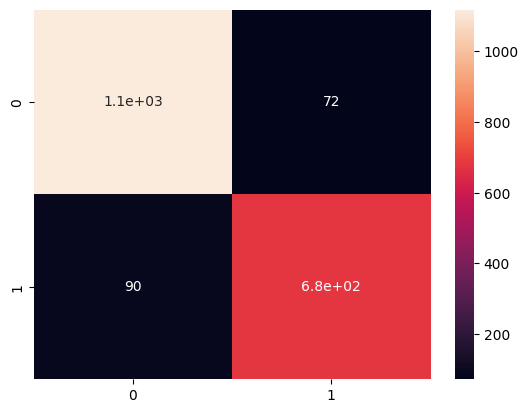

In [17]:
y_preds = clf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_mat, annot=True)

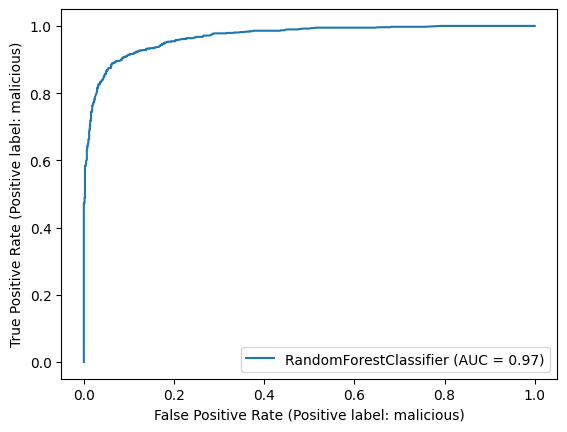

In [18]:
svc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)